# サンプルサイズと検出力の関係可視化

参考: [サンプルサイズの決め方 (統計ライブラリー)](https://www.amazon.co.jp/%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AB%E3%82%B5%E3%82%A4%E3%82%BA%E3%81%AE%E6%B1%BA%E3%82%81%E6%96%B9-%E7%B5%B1%E8%A8%88%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E3%83%BC-%E6%B0%B8%E7%94%B0-%E9%9D%96/dp/4254126654)

## モジュールインポート

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.ticker as ticker
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
from tqdm import tqdm

## シミュレーション

### データ生成

In [17]:
def generate_data(random_seed: int, tr_mu: float, cr_mu: float, sigma: float, data_size: int):
    '''サンプルサイズ設計対象となるデータを作成する
    Args:
        random_seed (int)  : 乱数のシード値
        tr_mu       (float): Treatment群の平均値
        cr_mu       (float): Control群の平均値
        sigma       (float): 各群の分散（等分散を仮定）
        data_size   (int)  : データの行数

    Returns:
        tr_data: Treatment群のデータ
        cr_data: Control群のデータ
    '''
    # シード値固定
    random_seed = random_seed
    np.random.seed(random_seed)
    
    # データ生成
    tr_data = np.random.normal(tr_mu, tr_sigma, data_size)
    cr_data = np.random.normal(cr_mu, cr_sigma, data_size)

    return tr_data, cr_data

### サンプルサイズ vs 検出力取得

In [43]:
def return_power_by_sample_size(sample_size: int, alpha: float, n_trials: int):
    '''サンプルサイズ設計対象となるデータより、サンプルサイズと検出力の関係を得る
    Args:
        sample_size(int)  : サンプルサイズ
        alpha      (float): 有意水準
        n_trials   (int)  : シミュレーション繰り返し回数

    Returns:
        power: 検出力
    '''
    significant_list = []
    for i in range(n_trials):
        tr_data, cr_data = generate_data(random_seed=i, tr_mu=2.1, cr_mu=2.0, sigma=0.5, data_size=sample_size)
        t_stat, p_value = ttest_ind(tr_data, cr_data, equal_var=True, alternative='greater')
        if p_value < alpha:
            significant_flag = 1
        else:
            significant_flag = 0
        significant_list.append(significant_flag)
    power = np.array(significant_list).mean()

    return power

### サンプルサイズ vs 検出力描画

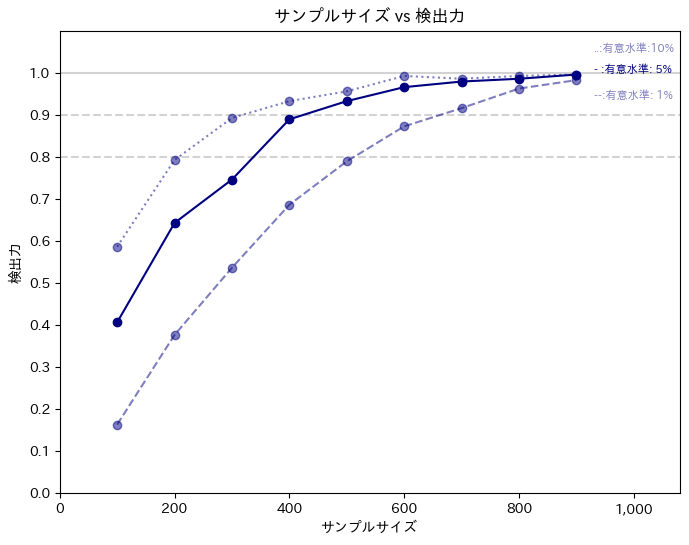

In [99]:
sample_size_list = list(range(100, 901, 100))
n_trials = 300

alpha = 0.05
power_at_alpha_005_list = []
for sample_size in sample_size_list:
    power = return_power_by_sample_size(sample_size=sample_size, alpha=alpha, n_trials=n_trials)
    power_at_alpha_005_list.append(power)

alpha = 0.01
power_at_alpha_001_list = []
for sample_size in sample_size_list:
    power = return_power_by_sample_size(sample_size=sample_size, alpha=alpha, n_trials=n_trials)
    power_at_alpha_001_list.append(power)

alpha = 0.1
power_at_alpha_010_list = []
for sample_size in sample_size_list:
    power = return_power_by_sample_size(sample_size=sample_size, alpha=alpha, n_trials=n_trials)
    power_at_alpha_010_list.append(power)

plt.figure(figsize=(8, 6))

plt.axhline(y=1.0, color='lightgray', linestyle='solid')
plt.axhline(y=0.9, color='lightgray', linestyle='dashed')
plt.axhline(y=0.8, color='lightgray', linestyle='dashed')

plt.plot(sample_size_list, power_at_alpha_010_list, marker='o', label='α=0.10', color='navy', linestyle='dotted', alpha=0.5)
plt.plot(sample_size_list, power_at_alpha_005_list, marker='o', label='α=0.05', color='navy')
plt.plot(sample_size_list, power_at_alpha_001_list, marker='o', label='α=0.01', color='navy', linestyle='dashed', alpha=0.5)

plt.title('サンプルサイズ vs 検出力')
plt.xlabel('サンプルサイズ')
plt.ylabel('検出力')
plt.xlim(0, sample_size_list[-1]*1.2)
plt.ylim(0, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.text(sample_size_list[-1]+30, power_at_alpha_010_list[-1]+0.05, '..:有意水準:10%', color='navy', va='bottom', ha='left', fontsize=8, alpha=0.5)
plt.text(sample_size_list[-1]+30, power_at_alpha_005_list[-1],      '- :有意水準: 5%', color='navy', va='bottom', ha='left', fontsize=8)
plt.text(sample_size_list[-1]+30, power_at_alpha_001_list[-1]-0.05, '--:有意水準: 1%', color='navy', va='bottom', ha='left', fontsize=8, alpha=0.5)
plt.show()